# Estimation

In [83]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import EstimationMethods as esti
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
from tqdm import tqdm

simplefilter(action='ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
domains = ['music', 'politics', 'health', 'technology']
X_text_dict = dict()
X_user_description_dict = dict()
X_user_covariates_dict = dict()
T_dict = dict()
Y_dict = dict()

for domain in domains:
    with open(f'pickles/encodings/{domain}/X_text_reduced.pkl', 'rb') as f: X_text_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/X_user_description_reduced.pkl', 'rb') as f: X_user_description_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/X_user_covariates.pkl', 'rb') as f: X_user_covariates_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/T.pkl', 'rb') as f: T_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/Y.pkl', 'rb') as f: Y_dict[domain] = pickle.load(f)

## Linear S-Learner and T-Learner

In [84]:
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
domains = ['music', 'politics', 'health', 'technology']
B = 100

s_learner_res = {
    k_domain: {
        k_treatment: {
            'ate': list(),
            'train_mse': list(),
            'test_mse': list()
        } for k_treatment in treatment_pairs
    } for k_domain in domains
}

t_learner_res = {
    k_domain: {
        k_treatment: {
            'ate': list(),
            'train_mse_0': list(),
            'test_mse_0': list(),
            'train_mse_1': list(),
            'test_mse_1': list()
        } for k_treatment in treatment_pairs
    } for k_domain in domains
}


for domain in domains:
    print(domain)
    for (t1, t2) in treatment_pairs:
        print(t1, t2)
        # Linear S-learner
        for b in tqdm(range(B)):
            ate, model, train_mse, test_mse = esti.S_learner(X_text_dict, X_user_description_dict, X_user_covariates_dict, T_dict, Y_dict, 
                                                     t1=t1, t2=t2, domain=domain, model=LinearRegression(), sample_with_replacements=True)
            s_learner_res[domain][(t1, t2)]['ate'].append(ate)
            s_learner_res[domain][(t1, t2)]['train_mse'].append(train_mse)
            s_learner_res[domain][(t1, t2)]['test_mse'].append(test_mse)
        
        # Linear T-learner
        for b in tqdm(range(B)):
            ate, model_0, model_1, train_mse_0, test_mse_0, train_mse_1, test_mse_1 = esti.T_learner(X_text_dict, X_user_description_dict, X_user_covariates_dict, 
                                                                                                     T_dict, Y_dict, t1=t1, t2=t2, domain=domain, 
                                                                                                     model_0=Lasso(), model_1=Lasso(), sample_with_replacements=True)
            t_learner_res[domain][(t1, t2)]['ate'].append(ate)
            t_learner_res[domain][(t1, t2)]['train_mse_0'].append(train_mse_0)
            t_learner_res[domain][(t1, t2)]['test_mse_0'].append(test_mse_0)
            t_learner_res[domain][(t1, t2)]['train_mse_1'].append(train_mse_1)
            t_learner_res[domain][(t1, t2)]['test_mse_1'].append(test_mse_1)

music
0 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


1 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.37it/s]


2 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.63it/s]


3 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.73it/s]


politics
0 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.66it/s]


1 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


2 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.02it/s]


3 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.17it/s]


health
0 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.86it/s]


1 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.86it/s]


2 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.50it/s]


3 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.21it/s]


technology
0 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.65it/s]


1 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.51it/s]


2 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.48it/s]


3 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.87it/s]


In [87]:
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
for domain in domains:
    for (t1, t2) in treatment_pairs:
        print(domain)
        print((treatment_names[t2], treatment_names[t1]))
        print()
        print('S-learner')
        print(f'ATE {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["ate"])}')
        print(f'train_mse {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["train_mse"])}')
        print(f'test_mse {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["test_mse"])}')
        print()
        print('T-learner')
        print(f'ATE {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["ate"])}')
        print(f'train_mse_0 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["train_mse_0"])}')
        print(f'test_mse_0 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["test_mse_0"])}')
        print(f'train_mse_1 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["train_mse_1"])}')
        print(f'test_mse_1 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["test_mse_1"])}')
        print('------------------------------------------------------------------------------------')
        print('------------------------------------------------------------------------------------')

music
('6-12', '0-6')

S-learner
ATE [-0.23920791637814473, 0.005529679871942565]
train_mse [0.32213145422382083, 0.3978648518590186]
test_mse [1.8393340545064516, 113664963.16394253]

T-learner
ATE [-0.09479619161162474, 0.019545566472422043]
train_mse_0 [0.7969816767740197, 0.9228597311778]
test_mse_0 [0.6642507173229246, 1.1031319712704963]
train_mse_1 [0.7646414709687903, 0.9374615704266155]
test_mse_1 [0.5832554930410544, 1.12356065809468]
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
music
('12-18', '6-12')

S-learner
ATE [-0.10628918089169483, 0.10718258504380612]
train_mse [0.4030327233258154, 0.4731572377828261]
test_mse [1.5008870864177803, 182507241.37217942]

T-learner
ATE [-0.062183160828699124, 0.05866941127559187]
train_mse_0 [0.7524036556553181, 0.9380615294031118]
test_mse_0 [0.5997454129118202, 1.1024021915461444]
train_mse_1 [0.7654249529870832,

## Linear X-Learner

In [157]:
def plot_feature_importance(model, ax, shapes, title):
    feature_importance = model.coef_
    text_fi = feature_importance[0:shapes['text']]
    user_d_fi = feature_importance[shapes['text']:shapes['text']+shapes['user_d']]
    user_c_fi = feature_importance[shapes['text']+shapes['user_d']:shapes['text']+shapes['user_d']+shapes['user_c']]
    domain_fi = feature_importance[-shapes['domain']:]
    text_fi = np.abs(text_fi).mean()
    user_d_fi = np.abs(user_d_fi).mean()
    user_c_fi = np.abs(user_c_fi).mean()
    domain_fi = np.abs(domain_fi).mean()
    
    ax.bar(['text', 'user description', 'user covariates', 'domain'], [text_fi, user_d_fi, user_c_fi, domain_fi])
    ax.set_title(title)

In [164]:
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
res_models = dict()
for (t1, t2) in treatment_pairs:
        tau_hat_0, tau_hat_1, f_0, f_1, train_mse_0, test_mse_0, train_mse_1, test_mse_1 = esti.X_learner(X_text_dict,
                                                                                                          X_user_description_dict, X_user_covariates_dict, T_dict, Y_dict,
                                                                                                          t1=t1, t2=t2, 
                                                                                                          f_0=Lasso(), f_1=Lasso(), 
                                                                                                          tau_hat_0=LinearRegression(), tau_hat_1=LinearRegression(),
                                                                                                          g=lambda x: 0.5, test_portion=0.1, random_state=42, print_progress=False)
        res_models[(t1, t2)] = (tau_hat_0, tau_hat_1)
        print((treatment_names[t2], treatment_names[t1]))
        print(f'train_mse_0 = {train_mse_0}')
        print(f'test_mse_0 = {test_mse_0}')
        print(f'train_mse_1 = {train_mse_1}')
        print(f'train_mse_0 = {train_mse_0}')
        print()

('6-12', '0-6')
train_mse_0 = 0.900099188140052
test_mse_0 = 0.8501899238765714
train_mse_1 = 0.872620568104269
train_mse_0 = 0.900099188140052

('12-18', '6-12')
train_mse_0 = 0.872620568104269
test_mse_0 = 0.9196704780274816
train_mse_1 = 0.8457292716672409
train_mse_0 = 0.872620568104269

('18-0', '12-18')
train_mse_0 = 0.8457292716672409
test_mse_0 = 0.897146269449552
train_mse_1 = 0.812955211953679
train_mse_0 = 0.8457292716672409

('0-6', '18-0')
train_mse_0 = 0.812955211953679
test_mse_0 = 0.9087002181420786
train_mse_1 = 0.900099188140052
train_mse_0 = 0.812955211953679



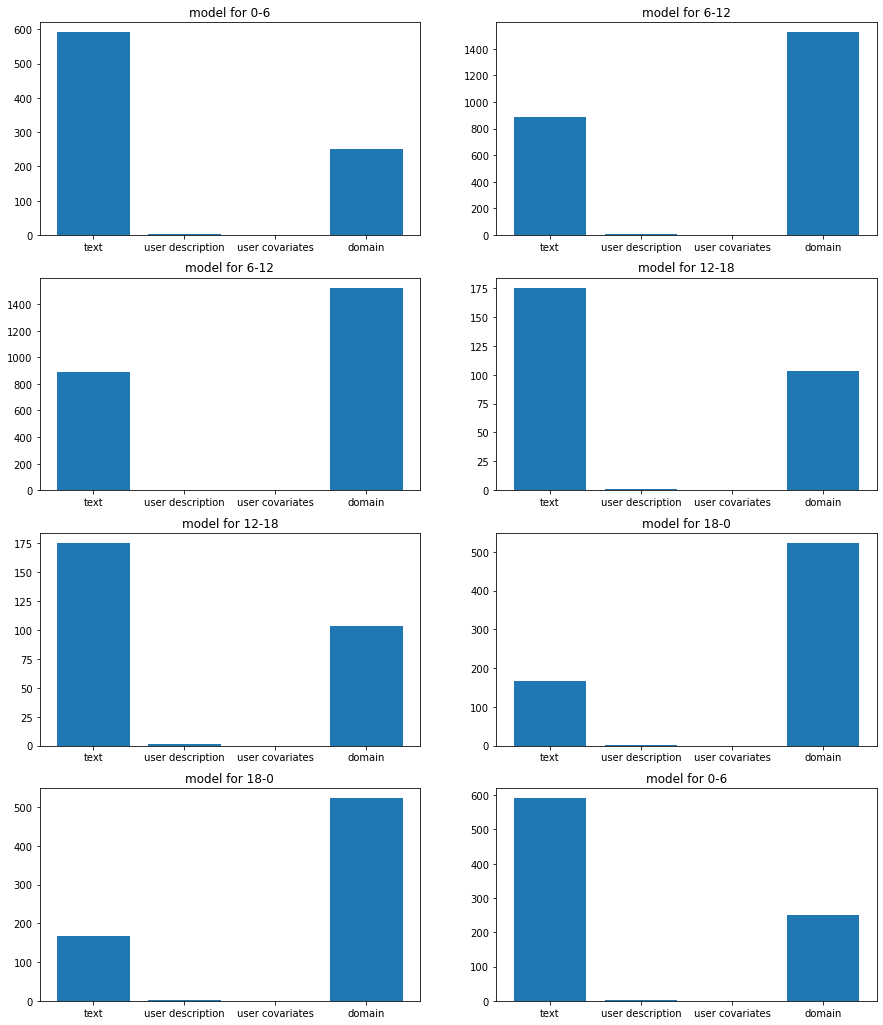

In [166]:
text_shape = X_text_dict['music'].shape[1]
user_d_shape = X_user_description_dict['music'].shape[1]
user_c_shape = X_user_covariates_dict['music'].shape[1]
domain_shape = len(domains)
feature_shapes = dict(text=text_shape, user_d=user_d_shape, user_c=user_c_shape, domain=domain_shape)
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
fig, ax = plt.subplots(4,2,figsize=(15,18))
for row_idx, (t1, t2) in enumerate(treatment_pairs):
    tau_hat_0, tau_hat_1 = res_models[(t1, t2)]
    plot_feature_importance(tau_hat_0, ax[row_idx, 0], feature_shapes, title=f'model for {treatment_names[t1]}')
    plot_feature_importance(tau_hat_1, ax[row_idx, 1], feature_shapes, title=f'model for {treatment_names[t2]}')